# Importing usefull libraries

In [6]:
# For http requests
import urllib.request
import requests

import pickle # For loading the models

# For image visualizations
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
# Creating an API http request

url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".format(285)
response = requests.get(url)
print(response)

<Response [200]>


In [18]:
# Let us convert it to JSON and see the keys

response = response.json()
response.keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [19]:
# Now we need the poster path

response['poster_path']

'/2YMnBRh8F6fDGCCEIPk9Hb0cEyB.jpg'

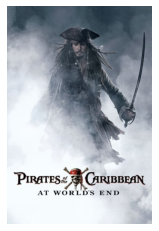

In [21]:
# Now that we got the last path let us concatenate it with an http API and see the image

image_api = "https://image.tmdb.org/t/p/w500/"
poster_path = response['poster_path']

urllib.request.urlretrieve(image_api+poster_path,'poster.png')
image = Image.open('poster.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [26]:
# Let us create a function that will return path to the poster image

def fetch_poster(movie_id):
    
    url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".\
                            format(movie_id)
    response = requests.get(url)
    response = response.json()
    image_api = "https://image.tmdb.org/t/p/w500/"
    poster_path = response['poster_path']

    urllib.request.urlretrieve(image_api+poster_path,'poster.png')
    image = Image.open('poster.png')
    plt.imshow(image)
    plt.axis('off')
    plt.show()

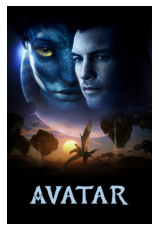

In [28]:
fetch_poster(19995)